## Predicting Diabetes using Ensemble Learning - Bagging

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import mode

Load the dataset

In [2]:
dataset=pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.size

6912

In [4]:
dataset.shape

(768, 9)

Pre-processing

In [5]:
#Check for missing values
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
#Handle missing values
dataset.fillna(dataset.mean(),inplace=True)

In [7]:
#Normalize the data
scaler=MinMaxScaler()
dataset[dataset.columns]=scaler.fit_transform(dataset[dataset.columns])

In [9]:
# X as the Feature Matrix
# y as the response vector

X=dataset[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=dataset['Outcome']

In [10]:
#Split the data into training and testing sets
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.2,random_state=0)

Modeling

In [11]:
# Create the base models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [12]:
# Create the bagging classifier
bag_log_reg = BaggingClassifier(base_estimator=log_reg, n_estimators=10, random_state=0)
bag_decision_tree = BaggingClassifier(base_estimator=decision_tree, n_estimators=10, random_state=0)
bag_random_forest = BaggingClassifier(base_estimator=random_forest, n_estimators=10, random_state=0)

In [13]:
# Train the models
bag_log_reg.fit(X_trainset, y_trainset)
bag_decision_tree.fit(X_trainset, y_trainset)
bag_random_forest.fit(X_trainset, y_trainset)

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=0)

Prediction

In [14]:
y_pred_log_reg = bag_log_reg.predict(X_testset)
y_pred_decision_tree = bag_decision_tree.predict(X_testset)
y_pred_random_forest = bag_random_forest.predict(X_testset)

In [15]:
# # Combine the predictions
# y_pred = (y_pred_log_reg + y_pred_decision_tree + y_pred_random_forest) / 3


y_pred = mode([y_pred_log_reg, y_pred_decision_tree, y_pred_random_forest])[0][0]

In [16]:
# Getting prediction results for tetsing part of the report (last 15 outcomes)
y_pred[y_pred.size-15:y_pred.size]

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# Getting actual results for tetsing part of the report (last 15 outcomes)
y_testset
y_testset.tail(15)

653    0.0
331    0.0
568    0.0
196    0.0
76     0.0
64     1.0
671    0.0
52     0.0
310    0.0
416    0.0
476    1.0
482    0.0
230    1.0
527    0.0
380    0.0
Name: Outcome, dtype: float64

Evaluation

In [18]:
# Evaluate the performance
print("Ensemble Accuracy: %0.4f" % accuracy_score(y_testset, y_pred))
print("Precision: %0.4f" % precision_score(y_testset, y_pred))
print("Recall: %0.4f" % recall_score(y_testset, y_pred))
print("F1-score:  %0.4f" % f1_score(y_testset, y_pred))

Ensemble Accuracy: 0.8377
Precision: 0.7619
Recall: 0.6809
F1-score:  0.7191


In [19]:
# To compute the AUC
ensemble_auc = roc_auc_score(y_testset, y_pred)
print("Ensemble AUC: %0.2f" % roc_auc_score(y_testset, y_pred))

Ensemble AUC: 0.79


In [20]:
# Perform k-fold cross validation
y_pred_log_reg_cv = cross_val_predict(bag_log_reg, X, y, cv=20)
y_pred_decision_tree_cv = cross_val_predict(bag_decision_tree, X, y, cv=20)
y_pred_random_forest_cv = cross_val_predict(bag_random_forest, X, y, cv=20)

y_pred_cv = mode([y_pred_log_reg_cv, y_pred_decision_tree_cv, y_pred_random_forest_cv])[0][0]

ensembleAcc_cv=accuracy_score(y, y_pred_cv)
ensembleAuc_cv=roc_auc_score(y, y_pred_cv)

print("Ensemble Cross-Validated Accuracy: %0.4f" % accuracy_score(y, y_pred_cv))
print("Ensemble Cross-Validated AUC: %0.2f" % roc_auc_score(y, y_pred_cv))

Ensemble Cross-Validated Accuracy: 0.7812
Ensemble Cross-Validated AUC: 0.74


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_testset,y_pred)
cm

array([[97, 10],
       [15, 32]], dtype=int64)

Text(69.0, 0.5, 'Truth')

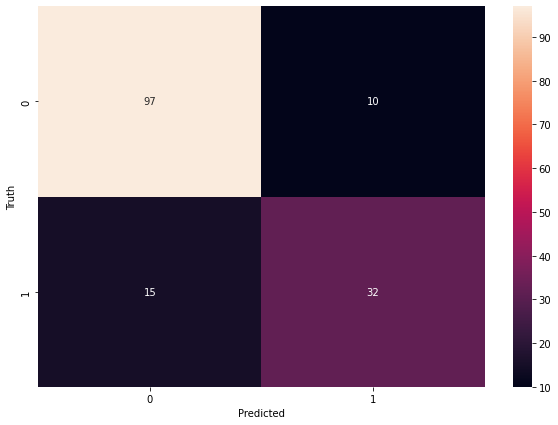

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')